<a href="https://colab.research.google.com/github/CharlaChai/COMBINE_workshop/blob/main/3_GNN_NodePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Details

- Understand the functioning of GNN through node prediction task

In [ ]:
### Install dependencies
pip install torch torch_geometric

Note: you may need to restart the kernel to use updated packages.


In [ ]:
### Packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.optim as optim
import numpy as np
import networkx as nx

In [1]:
# Generate a random graph
num_nodes = 50
num_edges = 100

In [ ]:
# Create a random graph with NetworkX
G = nx.gnm_random_graph(num_nodes, num_edges)

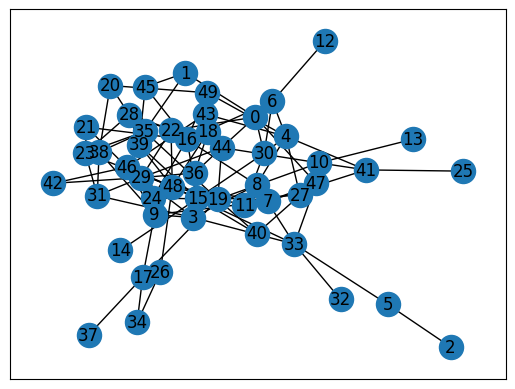

In [ ]:
# Draw the network
nx.draw_networkx(G)

In [ ]:
# Add binary labels to nodes
labels = np.random.choice([0, 1], num_nodes)

In [ ]:
# Convert NetworkX graph to edge index
edge_index = torch.tensor(list(G.edges)).t().contiguous()

In [ ]:
# Generate random node features
node_features = torch.randn(num_nodes, 16)  # 16 features per node

In [ ]:
# Create PyTorch Geometric data object
data = Data(x=node_features, edge_index=edge_index, y=torch.tensor(labels))

# Split data into train/test
data.train_mask = torch.zeros(num_nodes, dtype=torch.bool).bernoulli(0.8)
data.test_mask = ~data.train_mask

In [ ]:
# Define GNN model
class GCN(nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 32)
        self.conv2 = GCNConv(32, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test():
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out[data.test_mask].argmax(dim=1)
        correct = (pred == data.y[data.test_mask]).sum().item()
        acc = correct / int(data.test_mask.sum())
    return pred, acc



In [ ]:
# Initialize model, optimizer, and loss function
model = GCN(num_node_features=node_features.size(1), num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Train the model
for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        pred, acc = test()
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')


Epoch: 010, Loss: 0.5000, Test Accuracy: 0.6667
Epoch: 020, Loss: 0.4155, Test Accuracy: 0.8333
Epoch: 030, Loss: 0.3563, Test Accuracy: 0.8333
Epoch: 040, Loss: 0.3062, Test Accuracy: 0.8333
Epoch: 050, Loss: 0.2541, Test Accuracy: 0.8333
Epoch: 060, Loss: 0.2020, Test Accuracy: 0.8333
Epoch: 070, Loss: 0.1536, Test Accuracy: 0.8333
Epoch: 080, Loss: 0.1115, Test Accuracy: 0.6667
Epoch: 090, Loss: 0.0794, Test Accuracy: 0.5000
Epoch: 100, Loss: 0.0567, Test Accuracy: 0.5000


In [ ]:
pred

tensor([0, 1, 1, 0, 1, 1])

In [ ]:
data.test_mask

tensor([False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False,  True, False, False,  True, False,
        False, False, False, False,  True, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False, False])

In [ ]:
labels

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1])